0it [00:00, ?it/s]

17:59:59.627 |  ZGI.TO


1it [00:02,  2.92s/it]

18:00:02.548 |  ZCN.TO


2it [00:05,  2.71s/it]

18:00:05.111 |  STPL.TO


3it [00:06,  2.15s/it]

18:00:06.604 |  ZIU.TO


4it [00:07,  1.49s/it]

18:00:07.067 |  COMM.TO


5it [00:08,  1.42s/it]

18:00:08.375 |  ZDM.TO


6it [00:11,  1.78s/it]

18:00:10.852 |  DISC.TO


7it [00:12,  1.68s/it]

18:00:12.337 |  ZEA.TO
18:00:12.433 |  ZEO.TO


9it [00:15,  1.48s/it]

18:00:14.863 |  ZEM.TO


10it [00:17,  1.75s/it]

18:00:17.376 |  ZGD.TO


11it [00:19,  1.85s/it]

18:00:19.501 |  ZUE.TO


12it [00:22,  2.03s/it]

18:00:22.013 |  ZJG.TO


13it [00:24,  2.17s/it]

18:00:24.536 |  ZSP.TO


14it [00:26,  2.14s/it]

18:00:26.609 |  ZEAT.TO


15it [00:27,  1.74s/it]

18:00:27.363 |  ZSP.U.TO


16it [00:30,  2.05s/it]

18:00:30.160 |  ZMT.TO


17it [00:33,  2.18s/it]

18:00:32.657 |  ZDJ.TO


18it [00:35,  2.29s/it]

18:00:35.193 |  ZQQ.TO
18:00:35.229 |  ESGA.TO


20it [00:36,  1.36s/it]

18:00:35.715 |  ZNQ.TO


21it [00:36,  1.14s/it]

18:00:36.209 |  ESGY.TO


22it [00:37,  1.12s/it]

18:00:37.252 |  ZNQ.U.TO


23it [00:39,  1.40s/it]

18:00:39.397 |  ESGE.TO


24it [00:40,  1.30s/it]

18:00:40.455 |  ZMID.F.TO


$ZMID.F.TO: possibly delisted; no timezone found
25it [00:42,  1.50s/it]

18:00:42.467 |  ESGG.TO


26it [00:43,  1.37s/it]

18:00:43.498 |  ZMID.TO


27it [00:44,  1.26s/it]

18:00:44.506 |  ZGRN.TO


28it [00:45,  1.09s/it]

18:00:45.194 |  ZMID.U.TO


$ZMID.U.TO: possibly delisted; no timezone found
29it [00:45,  1.15it/s]

18:00:45.529 |  ZCLN.TO


30it [00:46,  1.16it/s]

18:00:46.384 |  ZSML.F.TO


$ZSML.F.TO: possibly delisted; no timezone found
31it [00:48,  1.17s/it]

18:00:48.281 |  ESGB.TO


32it [00:49,  1.06it/s]

18:00:48.675 |  ZSML.TO


33it [00:50,  1.05it/s]

18:00:49.661 |  ESGF.TO


34it [00:51,  1.04it/s]

18:00:50.646 |  ZSML.U.TO


$ZSML.U.TO: possibly delisted; no timezone found
35it [00:51,  1.28it/s]

18:00:51.005 |  ZJPN.TO


36it [00:52,  1.27it/s]

18:00:51.800 |  ZJPN.F.TO


$ZJPN.F.TO: possibly delisted; no timezone found
37it [00:54,  1.14s/it]

18:00:53.767 |  ZCS.TO


38it [00:56,  1.55s/it]

18:00:56.278 |  ZID.TO
18:00:56.357 |  ZCS.L.TO


$ZCS.L.TO: possibly delisted; no timezone found
40it [00:57,  1.07it/s]

18:00:56.693 |  ZCH.TO


41it [00:59,  1.32s/it]

18:00:59.213 |  ZCM.TO


42it [01:02,  1.64s/it]

18:01:01.752 |  ZLC.TO


43it [01:04,  1.88s/it]

18:01:04.283 |  ZLB.TO
18:01:04.313 |  ZPS.TO


45it [01:07,  1.60s/it]

18:01:06.750 |  ZLH.TO


46it [01:08,  1.59s/it]

18:01:08.302 |  ZPS.L.TO


$ZPS.L.TO: possibly delisted; no timezone found
47it [01:10,  1.62s/it]

18:01:10.026 |  ZLU.TO
18:01:10.058 |  ZFS.TO


49it [01:12,  1.47s/it]

18:01:12.548 |  ZLU.U.TO


$ZLU.U.TO: possibly delisted; no timezone found
50it [01:13,  1.21s/it]

18:01:12.907 |  ZFS.L.TO


$ZFS.L.TO: possibly delisted; no timezone found
51it [01:15,  1.40s/it]

18:01:14.857 |  ZLD.TO


52it [01:16,  1.43s/it]

18:01:16.373 |  ZMP.TO


53it [01:19,  1.90s/it]

18:01:19.541 |  ZLI.TO


54it [01:22,  2.06s/it]

18:01:21.994 |  ZPL.TO


55it [01:24,  2.14s/it]

18:01:24.356 |  ZLE.TO


56it [01:26,  1.97s/it]

18:01:25.913 |  ZFM.TO


57it [01:28,  2.13s/it]

18:01:28.421 |  ZUQ.F.TO


$ZUQ.F.TO: possibly delisted; no timezone found
58it [01:29,  1.65s/it]

18:01:28.909 |  ZFL.TO


59it [01:31,  1.89s/it]

18:01:31.375 |  ZUQ.TO
18:01:31.405 |  ZUQ.U.TO


$ZUQ.U.TO: possibly delisted; no timezone found
61it [01:33,  1.53s/it]

18:01:33.608 |  ZAG.TO


62it [01:36,  1.79s/it]

18:01:36.171 |  ZGQ.TO
18:01:36.203 |  ZSB.TO


64it [01:37,  1.33s/it]

18:01:37.541 |  ZEQ.TO


65it [01:39,  1.46s/it]

18:01:39.439 |  ZCB.TO


66it [01:41,  1.42s/it]

18:01:40.734 |  ZDV.TO


67it [01:43,  1.64s/it]

18:01:42.991 |  ZDB.TO


68it [01:45,  1.72s/it]

18:01:44.922 |  ZUD.TO


69it [01:47,  1.82s/it]

18:01:46.996 |  ZSDB.TO


70it [01:47,  1.41s/it]

18:01:47.395 |  ZDY.TO


71it [01:49,  1.62s/it]

18:01:49.533 |  ZCDB.TO


72it [01:50,  1.35s/it]

18:01:50.236 |  ZDY.U.TO


$ZDY.U.TO: possibly delisted; no timezone found
73it [01:50,  1.06s/it]

18:01:50.587 |  ZMMK.TO


74it [01:51,  1.04it/s]

18:01:51.330 |  ZDH.TO


75it [01:53,  1.18s/it]

18:01:53.021 |  ZST.TO


76it [01:55,  1.53s/it]

18:01:55.381 |  ZDI.TO


77it [01:57,  1.63s/it]

18:01:57.246 |  ZST.L.TO


$ZST.L.TO: possibly delisted; no timezone found
78it [01:59,  1.73s/it]

18:01:59.201 |  ZVC.TO


79it [02:00,  1.61s/it]

18:02:00.522 |  ZMBS.TO


80it [02:01,  1.42s/it]

18:02:01.514 |  ZVU.TO


81it [02:03,  1.39s/it]

18:02:02.816 |  ZGB.TO


82it [02:04,  1.36s/it]

18:02:04.119 |  ZRR.TO


83it [02:06,  1.70s/it]

18:02:06.609 |  ZOCT.TO


$ZOCT.TO: possibly delisted; no timezone found
84it [02:07,  1.29s/it]

18:02:06.950 |  ZBI.TO


85it [02:08,  1.12s/it]

18:02:07.674 |  ZJUL.TO


$ZJUL.TO: possibly delisted; no timezone found
86it [02:10,  1.41s/it]

18:02:09.768 |  ZBBB.TO


87it [02:11,  1.29s/it]

18:02:10.760 |  ZAPR.TO


$ZAPR.TO: possibly delisted; no timezone found
88it [02:11,  1.00s/it]

18:02:11.097 |  ZQB.TO


89it [02:12,  1.01s/it]

18:02:12.117 |  ZJAN.TO


$ZJAN.TO: possibly delisted; no timezone found
90it [02:14,  1.36s/it]

18:02:14.302 |  ZUAG.TO


91it [02:15,  1.11s/it]

18:02:14.841 |  ZWC.TO


92it [02:16,  1.22s/it]

18:02:16.303 |  ZUAG.F.TO


$ZUAG.F.TO: possibly delisted; no timezone found
93it [02:17,  1.00s/it]

18:02:16.803 |  ZWS.TO


94it [02:18,  1.14s/it]

18:02:18.257 |  ZUAG.U.TO


$ZUAG.U.TO: possibly delisted; no timezone found
95it [02:20,  1.37s/it]

18:02:20.177 |  ZWH.TO


96it [02:22,  1.54s/it]

18:02:22.092 |  ZSU.TO


97it [02:24,  1.65s/it]

18:02:23.997 |  ZWH.U.TO


$ZWH.U.TO: possibly delisted; no timezone found
98it [02:24,  1.25s/it]

18:02:24.332 |  ZMU.TO


99it [02:26,  1.48s/it]

18:02:26.351 |  ZWA.TO


100it [02:28,  1.71s/it]

18:02:28.602 |  ZIC.TO


101it [02:31,  1.82s/it]

18:02:30.681 |  ZWE.TO
18:02:30.710 |  ZIC.U.TO


$ZIC.U.TO: possibly delisted; no timezone found
103it [02:33,  1.45s/it]

18:02:32.701 |  ZWP.TO


104it [02:34,  1.41s/it]

18:02:33.988 |  ZUCM.TO


105it [02:34,  1.15s/it]

18:02:34.418 |  ZWG.TO
18:02:34.450 |  ZUCM.U.TO


$ZUCM.U.TO: possibly delisted; no timezone found
107it [02:35,  1.36it/s]

18:02:34.779 |  ZWB.TO


108it [02:37,  1.12s/it]

18:02:37.141 |  ZUS.U.TO


$ZUS.U.TO: possibly delisted; no timezone found
109it [02:39,  1.29s/it]

18:02:38.967 |  ZWB.U.TO


$ZWB.U.TO: possibly delisted; no timezone found
110it [02:39,  1.05s/it]

18:02:39.318 |  ZUS.V.TO


$ZUS.V.TO: possibly delisted; no timezone found
111it [02:41,  1.22s/it]

18:02:41.001 |  ZWK.TO


112it [02:42,  1.12s/it]

18:02:41.863 |  ZTS.TO


$ZTS.TO: possibly delisted; no timezone found
113it [02:42,  1.12it/s]

18:02:42.196 |  ZWU.TO


114it [02:44,  1.12s/it]

18:02:43.859 |  ZTS.U.TO


$ZTS.U.TO: possibly delisted; no timezone found
115it [02:46,  1.34s/it]

18:02:45.751 |  ZWHC.TO


116it [02:46,  1.07s/it]

18:02:46.155 |  ZTM.TO


$ZTM.TO: possibly delisted; no timezone found
117it [02:46,  1.18it/s]

18:02:46.489 |  ZWEN.TO


118it [02:47,  1.37it/s]

18:02:46.942 |  ZTM.U.TO


$ZTM.U.TO: possibly delisted; no timezone found
119it [02:48,  1.02s/it]

18:02:48.625 |  ZWT.TO


120it [02:49,  1.11it/s]

18:02:49.245 |  ZTL.F.TO


$ZTL.F.TO: possibly delisted; no timezone found
121it [02:50,  1.34it/s]

18:02:49.642 |  ZWQT.TO


122it [02:50,  1.57it/s]

18:02:50.019 |  ZTL.TO


$ZTL.TO: possibly delisted; no timezone found
123it [02:52,  1.05it/s]

18:02:51.713 |  ZPAY.F.TO


$ZPAY.F.TO: possibly delisted; no timezone found
124it [02:52,  1.29it/s]

18:02:52.074 |  ZTL.U.TO


$ZTL.U.TO: possibly delisted; no timezone found
125it [02:54,  1.06s/it]

18:02:53.793 |  ZPAY.TO


126it [02:54,  1.04it/s]

18:02:54.537 |  ZTIP.TO


127it [02:55,  1.15it/s]

18:02:55.183 |  ZPAY.U.TO


$ZPAY.U.TO: possibly delisted; no timezone found
128it [02:56,  1.32it/s]

18:02:55.678 |  ZTIP.U.TO


$ZTIP.U.TO: possibly delisted; no timezone found
129it [02:57,  1.04s/it]

18:02:57.390 |  ZPH.TO


130it [02:58,  1.05s/it]

18:02:58.447 |  ZTIP.F.TO


$ZTIP.F.TO: possibly delisted; no timezone found
131it [02:59,  1.20it/s]

18:02:58.779 |  ZPW.TO


132it [03:00,  1.05it/s]

18:03:00.023 |  ZJK.TO


133it [03:01,  1.03it/s]

18:03:01.035 |  ZPW.U.TO


$ZPW.U.TO: possibly delisted; no timezone found
134it [03:03,  1.23s/it]

18:03:02.871 |  ZHY.TO


135it [03:05,  1.41s/it]

18:03:04.699 |  ZJK.U.TO


$ZJK.U.TO: possibly delisted; no timezone found
136it [03:05,  1.10s/it]

18:03:05.072 |  ZEB.TO


137it [03:07,  1.32s/it]

18:03:06.919 |  ZFH.TO


138it [03:08,  1.36s/it]

18:03:08.378 |  ZUT.TO


139it [03:10,  1.52s/it]

18:03:10.255 |  ZEF.TO


140it [03:12,  1.63s/it]

18:03:12.134 |  ZRE.TO


141it [03:14,  1.69s/it]

18:03:13.978 |  ZIN.TO


142it [03:15,  1.65s/it]

18:03:15.546 |  ZPR.TO


143it [03:17,  1.62s/it]

18:03:17.101 |  ZUB.TO


144it [03:19,  1.68s/it]

18:03:18.909 |  ZPR.U.TO


$ZPR.U.TO: possibly delisted; no timezone found
145it [03:20,  1.67s/it]

18:03:20.560 |  ZBK.TO


146it [03:22,  1.60s/it]

18:03:21.994 |  ZHP.TO


147it [03:23,  1.45s/it]

18:03:23.083 |  ZUH.TO


148it [03:25,  1.58s/it]

18:03:24.980 |  ZUP.TO


149it [03:26,  1.43s/it]

18:03:26.044 |  ZHU.TO


150it [03:27,  1.25s/it]

18:03:26.867 |  ZUP.U.TO


$ZUP.U.TO: possibly delisted; no timezone found
151it [03:27,  1.03it/s]

18:03:27.189 |  PAGE.TO


$PAGE.TO: possibly delisted; no timezone found
152it [03:29,  1.29s/it]

18:03:29.229 |  Ticker.TO


$TICKER.TO: possibly delisted; no timezone found
153it [03:29,  1.00it/s]

18:03:29.545 |  Date.TO


$DATE.TO: possibly delisted; no timezone found
154it [03:31,  1.22s/it]

18:03:31.276 |  ASSET.TO


$ASSET.TO: possibly delisted; no timezone found
155it [03:31,  1.05it/s]

18:03:31.610 |  ZCON.TO


156it [03:32,  1.08it/s]

18:03:32.482 |  ZBAL.TO


157it [03:33,  1.10it/s]

18:03:33.340 |  ZGRO.TO


158it [03:34,  1.11it/s]

18:03:34.217 |  ZEQT.TO


159it [03:35,  1.25it/s]

18:03:34.787 |  ZESG.TO


160it [03:35,  1.27it/s]

18:03:35.550 |  ZBAL.T.TO


$ZBAL.T.TO: possibly delisted; no timezone found
161it [03:37,  1.09s/it]

18:03:37.346 |  ZGRO.T.TO


$ZGRO.T.TO: possibly delisted; no timezone found
162it [03:38,  1.15it/s]

18:03:37.696 |  ZMI.TO


163it [03:39,  1.14s/it]

18:03:39.459 |  ACTIVE.TO


$ACTIVE.TO: possibly delisted; no timezone found
164it [03:41,  1.33s/it]

18:03:41.242 |  ZLSC.TO


165it [03:41,  1.03s/it]

18:03:41.585 |  ZLSU.TO


166it [03:42,  1.19it/s]

18:03:41.979 |  ZZZD.TO


167it [03:43,  1.19it/s]

18:03:42.823 |  ZACE.TO


168it [03:43,  1.30it/s]

18:03:43.424 |  ARKK.TO


169it [03:44,  1.51it/s]

18:03:43.828 |  ARKG.TO


170it [03:44,  1.71it/s]

18:03:44.231 |  ARKW.TO


171it [03:45,  1.87it/s]

18:03:44.654 |  BGEQ.TO


$BGEQ.TO: possibly delisted; no timezone found
172it [03:45,  2.06it/s]

18:03:45.024 |  BGHC.TO


$BGHC.TO: possibly delisted; no timezone found
173it [03:47,  1.13it/s]

18:03:46.831 |  BGIF.TO


$BGIF.TO: possibly delisted; no timezone found
174it [03:47,  1.38it/s]

18:03:47.197 |  BGIN.TO


$BGIN.TO: possibly delisted; no timezone found
175it [03:49,  1.05s/it]

18:03:49.015 |  BGDV.TO


$BGDV.TO: possibly delisted; no timezone found
176it [03:50,  1.02it/s]

18:03:49.829 |  BGRT.TO


$BGRT.TO: possibly delisted; no timezone found
177it [03:51,  1.19s/it]

18:03:51.508 |  GRNI.TO


178it [03:52,  1.01it/s]

18:03:52.025 |  TOWR.TO


179it [03:52,  1.19it/s]

18:03:52.525 |  WOMN.TO


180it [03:53,  1.47it/s]

18:03:52.829 |  ZGSB.TO


181it [03:54,  1.32it/s]

18:03:53.765 |  ZMSB.TO


182it [03:55,  1.25it/s]

18:03:54.672 |  ZCPB.TO


183it [03:56,  1.18it/s]

18:03:55.635 |  ZFC.TO


184it [03:56,  1.17it/s]

18:03:56.488 |  ZFN.TO


186it [03:57,  1.52it/s]

18:03:57.363 |  ZXLE.TO
18:03:57.553 |  ZXLU.TO


188it [03:58,  2.43it/s]

18:03:57.725 |  ZXLK.TO
18:03:57.900 |  ZXLB.TO


190it [03:58,  3.35it/s]

18:03:58.095 |  ZXLP.TO
18:03:58.283 |  ZXLY.TO


192it [03:58,  4.29it/s]

18:03:58.452 |  ZXLI.TO
18:03:58.623 |  ZXLC.TO


194it [03:59,  4.92it/s]

18:03:58.788 |  ZXLV.TO
18:03:58.968 |  ZXLF.TO


196it [03:59,  5.19it/s]

18:03:59.147 |  ZXLR.TO
18:03:59.332 |  ZXLE.F.TO


$ZXLE.F.TO: possibly delisted; no timezone found
197it [04:00,  4.33it/s]

18:03:59.652 |  ZXLU.F.TO


$ZXLU.F.TO: possibly delisted; no timezone found
198it [04:01,  1.41it/s]

18:04:01.482 |  ZXLK.F.TO


$ZXLK.F.TO: possibly delisted; no timezone found
199it [04:02,  1.64it/s]

18:04:01.855 |  ZXLB.F.TO


$ZXLB.F.TO: possibly delisted; no timezone found
200it [04:04,  1.04it/s]

18:04:03.641 |  ZXLP.F.TO


$ZXLP.F.TO: possibly delisted; no timezone found
201it [04:04,  1.25it/s]

18:04:04.065 |  ZXLY.F.TO


$ZXLY.F.TO: possibly delisted; no timezone found
202it [04:06,  1.11s/it]

18:04:05.888 |  ZXLI.F.TO


$ZXLI.F.TO: possibly delisted; no timezone found
203it [04:06,  1.14it/s]

18:04:06.229 |  ZXLC.F.TO


$ZXLC.F.TO: possibly delisted; no timezone found
204it [04:08,  1.13s/it]

18:04:07.962 |  ZXLV.F.TO


$ZXLV.F.TO: possibly delisted; no timezone found
205it [04:08,  1.11it/s]

18:04:08.309 |  ZXLF.F.TO


$ZXLF.F.TO: possibly delisted; no timezone found
206it [04:10,  1.15s/it]

18:04:10.041 |  ZXLR.F.TO


$ZXLR.F.TO: possibly delisted; no timezone found
207it [04:10,  1.10it/s]

18:04:10.394 |  CDZ.TO


208it [04:13,  1.46s/it]

18:04:13.141 |  CEW.TO


209it [04:15,  1.72s/it]

18:04:15.479 |  CGL.TO


210it [04:17,  1.77s/it]

18:04:17.371 |  CGL.C.TO


$CGL.C.TO: possibly delisted; no timezone found
211it [04:19,  1.74s/it]

18:04:19.038 |  CRQ.TO


212it [04:21,  1.84s/it]

18:04:21.091 |  RBC.TO


$RBC.TO: possibly delisted; no timezone found
213it [04:21,  1.38s/it]

18:04:21.422 |  RBNK.TO


214it [04:22,  1.32s/it]

18:04:22.590 |  RCD.TO


215it [04:24,  1.41s/it]

18:04:24.213 |  RCDC.TO


216it [04:25,  1.15s/it]

18:04:24.748 |  RCEI.TO


$RCEI.TO: possibly delisted; no timezone found
217it [04:26,  1.33s/it]

18:04:26.496 |  SVR.TO


218it [04:28,  1.50s/it]

18:04:28.407 |  SVR.C.TO


$SVR.C.TO: possibly delisted; no timezone found
219it [04:29,  1.20s/it]

18:04:28.887 |  XCG.TO


220it [04:31,  1.63s/it]

18:04:31.514 |  XCS.TO


221it [04:34,  1.85s/it]

18:04:33.873 |  XCSR.TO


222it [04:35,  1.55s/it]

18:04:34.742 |  XCV.TO


223it [04:37,  1.80s/it]

18:04:37.129 |  XDIV.TO


224it [04:38,  1.62s/it]

18:04:38.312 |  XDV.TO


225it [04:41,  1.90s/it]

18:04:40.885 |  XEG.TO


226it [04:44,  2.26s/it]

18:04:43.972 |  XEI.TO


227it [04:46,  2.13s/it]

18:04:45.797 |  XEN.TO


228it [04:48,  2.19s/it]

18:04:48.130 |  XESG.TO


229it [04:49,  1.82s/it]

18:04:49.102 |  XFN.TO


230it [04:52,  2.21s/it]

18:04:52.206 |  XIC.TO


231it [04:55,  2.48s/it]

18:04:55.316 |  XIT.TO


232it [04:58,  2.65s/it]

18:04:58.376 |  XIU.TO


233it [05:01,  2.82s/it]

18:05:01.599 |  XMA.TO


234it [05:04,  2.76s/it]

18:05:04.198 |  XMD.TO


235it [05:07,  2.87s/it]

18:05:07.338 |  XMV.TO


236it [05:09,  2.54s/it]

18:05:09.106 |  XRE.TO


237it [05:12,  2.65s/it]

18:05:12.020 |  XST.TO


238it [05:14,  2.40s/it]

18:05:13.845 |  XUT.TO


Best 20 ETFs by Q (slope/sigma):
Ticker	Slope	Sigma	Time Span	Q


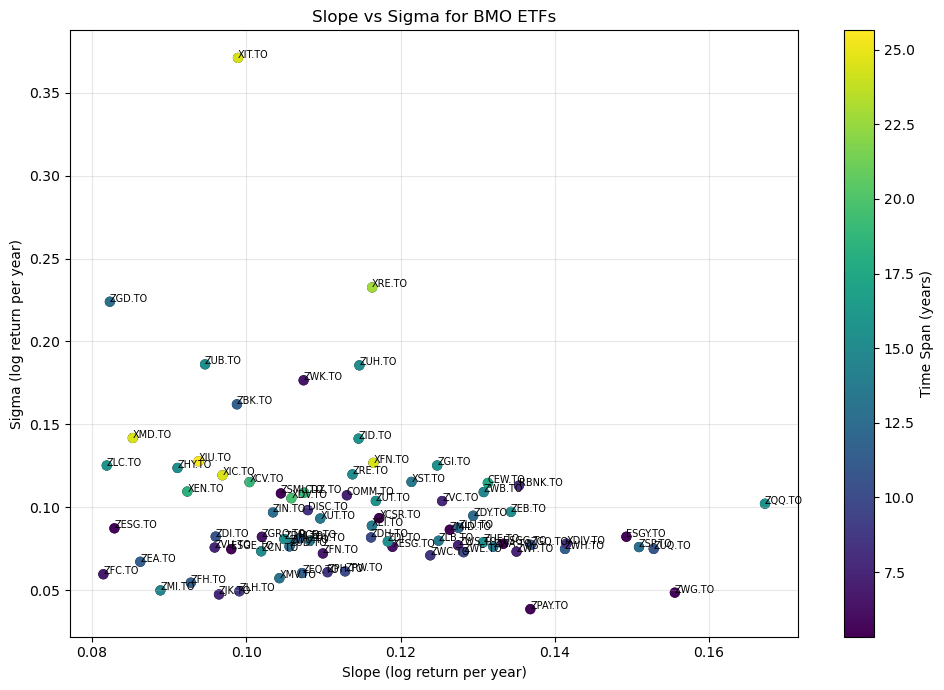

In [ ]:
import numpy as np
from scipy.optimize import minimize
import bydoux_tools as bt
from astropy.time import Time
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from tqdm import tqdm

verbose = False  # Set to True for detailed output

# List of BMO ETF tickers (with some non-ETF entries, but filtered later)
tickers = [
    'ZGI', 'ZCN', 'STPL', 'ZIU', 'COMM', 'ZDM', 'DISC', 'ZEA', 'ZEO', 'ZEM',
    'ZGD', 'ZUE', 'ZJG', 'ZSP', 'ZEAT', 'ZSP.U', 'ZMT', 'ZDJ', 'ZQQ', 'ESGA',
    'ZNQ', 'ESGY', 'ZNQ.U', 'ESGE', 'ZMID.F', 'ESGG', 'ZMID', 'ZGRN', 'ZMID.U', 'ZCLN',
    'ZSML.F', 'ESGB', 'ZSML', 'ESGF', 'ZSML.U', 'ZJPN', 'ZJPN.F', 'ZCS', 'ZID', 'ZCS.L',
    'ZCH', 'ZCM', 'ZLC', 'ZLB', 'ZPS', 'ZLH', 'ZPS.L', 'ZLU', 'ZFS', 'ZLU.U',
    'ZFS.L', 'ZLD', 'ZMP', 'ZLI', 'ZPL', 'ZLE', 'ZFM', 'ZUQ.F', 'ZFL', 'ZUQ',
    'ZUQ.U', 'ZAG', 'ZGQ', 'ZSB', 'ZEQ', 'ZCB', 'ZDV', 'ZDB', 'ZUD', 'ZSDB',
    'ZDY', 'ZCDB', 'ZDY.U', 'ZMMK', 'ZDH', 'ZST', 'ZDI', 'ZST.L', 'ZVC', 'ZMBS',
    'ZVU', 'ZGB', 'ZRR', 'ZOCT', 'ZBI', 'ZJUL', 'ZBBB', 'ZAPR', 'ZQB', 'ZJAN',
    'ZUAG', 'ZWC', 'ZUAG.F', 'ZWS', 'ZUAG.U', 'ZWH', 'ZSU', 'ZWH.U', 'ZMU', 'ZWA',
    'ZIC', 'ZWE', 'ZIC.U', 'ZWP', 'ZUCM', 'ZWG', 'ZUCM.U', 'ZWB', 'ZUS.U', 'ZWB.U',
    'ZUS.V', 'ZWK', 'ZTS', 'ZWU', 'ZTS.U', 'ZWHC', 'ZTM', 'ZWEN', 'ZTM.U', 'ZWT',
    'ZTL.F', 'ZWQT', 'ZTL', 'ZPAY.F', 'ZTL.U', 'ZPAY', 'ZTIP', 'ZPAY.U', 'ZTIP.U', 'ZPH',
    'ZTIP.F', 'ZPW', 'ZJK', 'ZPW.U', 'ZHY', 'ZJK.U', 'ZEB', 'ZFH', 'ZUT', 'ZEF',
    'ZRE', 'ZIN', 'ZPR', 'ZUB', 'ZPR.U', 'ZBK', 'ZHP', 'ZUH', 'ZUP', 'ZHU',
    'ZUP.U', 'PAGE', 'Ticker', 'Date', 'ASSET', 'ZCON', 'ZBAL', 'ZGRO', 'ZEQT', 'ZESG',
    'ZBAL.T', 'ZGRO.T', 'ZMI', 'ACTIVE', 'ZLSC', 'ZLSU', 'ZZZD', 'ZACE', 'ARKK', 'ARKG',
    'ARKW', 'BGEQ', 'BGHC', 'BGIF', 'BGIN', 'BGDV', 'BGRT', 'GRNI', 'TOWR', 'WOMN',
    'ZGSB', 'ZMSB', 'ZCPB', 'ZFC', 'ZFN', 'ZXLE', 'ZXLU', 'ZXLK', 'ZXLB', 'ZXLP',
    'ZXLY', 'ZXLI', 'ZXLC', 'ZXLV', 'ZXLF', 'ZXLR', 'ZXLE.F', 'ZXLU.F', 'ZXLK.F', 'ZXLB.F',
    'ZXLP.F', 'ZXLY.F', 'ZXLI.F', 'ZXLC.F', 'ZXLV.F', 'ZXLF.F', 'ZXLR.F',"CDZ", "CEW", "CGL", "CGL.C", "CRQ", "RBC", "RBNK", "RCD", "RCDC", "RCEI",
    "SVR", "SVR.C", "XCG", "XCS", "XCSR", "XCV", "XDIV", "XDV", "XEG", "XEI",
    "XEN", "XESG", "XFN", "XIC", "XIT", "XIU", "XMA", "XMD", "XMV", "XRE",
    "XST", "XUT"
]
# Add .TO suffix for Yahoo Finance Canada tickers
tickers = np.array([ticker + '.TO' for ticker in tickers])

# Arrays to store results for each ticker
time_spans = np.zeros(len(tickers))  # Time span of data in years
slopes = np.zeros(len(tickers))      # Linear fit slope (log return per year)
sigmas = np.zeros(len(tickers))      # Standard deviation of residuals
q = np.zeros(len(tickers))           # Quality metric (slope/sigma)

slp1s = []
slp2s = []
sg1s = []
sg2s = []
for iticker, ticker in tqdm(enumerate(tickers),leave = False):
    bt.printc(f'{ticker}')
    try:
        tbl = bt.read_quotes(ticker)
    except Exception as e:
        if verbose:
            bt.printc(f"Exception for {ticker}: {e}")
        continue
    # Skip if table is None or empty
    if tbl is None or len(tbl) == 0 or ('mjd' not in tbl.colnames) or (len(tbl['mjd']) == 0):
        if verbose:
            bt.printc(f"Failed to read or empty data for {ticker}")
        continue

    # Convert MJD to years for fitting
    yr = tbl['mjd'] / 365
    val = tbl['log_close']


    if np.max(yr) - np.min(yr) > 7:
        for off in range( np.floor(np.max(yr)-np.min(yr)-7).astype(int)):
            # time between -7 and -2
            g1 = (yr > np.max(yr) - 7-off) & (yr < np.max(yr) - 2-off)
            g2 = (yr > np.max(yr) - 2-off) & (yr < np.max(yr)-off)

            fit1 = np.polyfit(yr[g1], val[g1], 1)
            sg1 = np.std(val[g1] - (fit1[0] * yr[g1] + fit1[1]))
            slp1= fit1[0]
            fit2 = np.polyfit(yr[g2], val[g2], 1)
            sg2 = np.std(val[g2] - (fit2[0] * yr[g2] + fit2[1]))
            slp2 = fit2[0]
            plt.errorbar(slp1, slp2, xerr = sg1, yerr = sg2, fmt='o',alpha = 0.3)

            slp1s.append(slp1)
            slp2s.append(slp2)
            sg1s.append(sg1)
            sg2s.append(sg2)

    # Linear fit to log price vs. time
    fit = np.polyfit(yr, val, 1)
    slopes[iticker] = fit[0]
    sigmas[iticker] = np.std(val - (fit[0] * yr + fit[1]))

    # Time span in years
    time_spans[iticker] = (tbl['mjd'][-1] - tbl['mjd'][0]) / 365

slp1s = np.array(slp1s)
slp2s = np.array(slp2s)
sg1s = np.array(sg1s)
sg2s = np.array(sg2s)

plt.show()
stop

# Filter: keep only ETFs with enough data, reasonable slope, and nonzero sigma
keep = (sigmas != 0) & (time_spans > 5) & (slopes > 0.08) & (slopes < 0.25)
tickers = tickers[keep]
slopes = slopes[keep]
sigmas = sigmas[keep]
time_spans = time_spans[keep]

# Compute quality metric (Q = slope / sigma)
q = slopes / sigmas
ord = np.argsort(-q)  # Sort by descending Q

# Sort all arrays by Q
tickers = tickers[ord]
slopes = slopes[ord]
sigmas = sigmas[ord]
time_spans = time_spans[ord]
q = q[ord]

print('Best 20 ETFs by Q (slope/sigma):')
print('Ticker\tSlope\tSigma\tTime Span\tQ')
for iticker in range(min(20, len(tickers))):
    info = bt.get_info(tickers[iticker])
    if verbose:
        bt.printc('\t' + '\t'.join( info.get('longName', 'Unknown')))
        bt.printc(f"{tickers[iticker]} {slopes[iticker]*100:.1f} +- {sigmas[iticker]*100:.1f}%, dt = {time_spans[iticker]:.1f} yr, Q = {q[iticker]:.2f}")

# --- Visualization ---

# Normalize the color map to the range of time_spans
norm = mcolors.Normalize(vmin=np.min(time_spans), vmax=np.max(time_spans))
cmap = plt.colormaps['viridis']

plt.figure(figsize=(10, 7))
# Scatter plot: slope vs sigma, colored by time span
sc = plt.scatter(slopes, sigmas, c=time_spans, cmap=cmap, norm=norm, s=40, edgecolor='k')

# Highlight ETFs with "good" slope and time span
g = (slopes > 0.08) & (slopes < 0.25) & (time_spans > 3)
plt.scatter(slopes[g], sigmas[g], c=time_spans[g], cmap=cmap, norm=norm, s=40)

# Annotate each point with the ticker symbol
for iticker in range(len(tickers)):
    plt.text(slopes[iticker], sigmas[iticker], tickers[iticker], fontsize=7)

plt.xlabel('Slope (log return per year)')
plt.ylabel('Sigma (log return per year)')
plt.grid(True, alpha=0.3)
plt.title('Slope vs Sigma for BMO ETFs')

# Add colorbar for time span
cbar = plt.colorbar(sc)
cbar.set_label('Time Span (years)')

plt.tight_layout()
plt.show()